In [2]:
# use MNIST
# DataLoader, Transformation
# Multilayer Neural Net Model, activation function
# Loss and Optimizer
# Training Loop (batch training)
# Model evaluation (accuracy)
# GPU support

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


In [3]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
#hyper parameters
input_size = 28*28
hidden_size = 100 #you can try different size
num_classes = 10 #0-9
num_epochs = 4
batch_size = 100
learning_rate = 0.001

In [5]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                          transform=transforms.ToTensor(), download=True)

C:\Users\Naihe-G\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                          transform=transforms.ToTensor(), download=True)

In [7]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [8]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)
#100 samples due to batch size, 1 channel because only from black to white, 28*28 pixle

torch.Size([100, 1, 28, 28]) torch.Size([100])


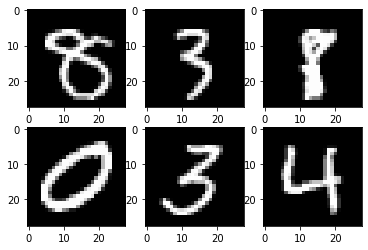

In [9]:
#work when first runn this cell, than run from begining
import matplotlib.pyplot as plt
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)

In [ ]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        #reshape the image from 100, 1, 28, 28 to 100, 784
        #######################python automatically find proper size when put -1
        images = images.reshape(-1, 784).to(device)
        labels = labels.to(device)
        
        #forward
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        #backwards
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

In [ ]:
#test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for i, (images, labels) in enumerate(test_loader):
        #reshape the image from 100, 1, 28, 28 to 100, 784
        #######################python automatically find proper size when put -1
        images = images.reshape(-1, 784)
        labels = labels.to(device)
        outputs = model(images)
        
        #value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct = (predictions == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')